# Linear regression example

In [2]:
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target


In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
X = bos.drop('PRICE', axis=1).values
y = bos.PRICE.values

X_min = X.min(axis=0)[None,:]
X_max = X.max(axis=0)[None,:]
X_mean = X.mean(axis=0)[None,:]
X_std = X.std(axis=0)[None,:]

y_max = y.max()

#X = (X - X_min) / (X_max - X_min) *y_max
X = (X - X_mean) / X_std 
X = np.minimum(5., X)
X = np.maximum(-5., X)
X = X * 4


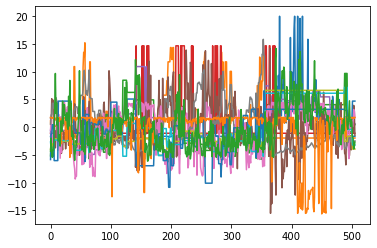

(-15.628773219924165, 20.0)

In [6]:
import matplotlib.pyplot as plt

plt.plot(X)
plt.show()

X.min(), X.max()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404,), (102,))

In [8]:
np.savetxt("data/X_train.csv", X_train, delimiter=",")
np.savetxt("data/X_test.csv", X_test, delimiter=",")
np.savetxt("data/y_train.csv", y_train, delimiter=",")
np.savetxt("data/y_test.csv", y_test, delimiter=",")


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)


In [10]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred))


4.431459533292037


In [204]:
lr.coef_, lr.intercept_, lr.coef_.min(), lr.coef_.max()


(array([-0.23066614,  0.26350455,  0.04890919,  0.2430082 , -0.52908837,
         0.61575084,  0.07514474, -0.68589204,  0.66074475, -0.52629309,
        -0.50002537,  0.20751989, -0.93685497]),
 22.447694763380788,
 -0.9368549675165523,
 0.6607447476456009)

In [205]:
np.savetxt("data/coeff.csv", lr.coef_, delimiter=",")
np.savetxt("data/intercept.csv", np.array([lr.intercept_]), delimiter=",")


In [206]:
lr.coef_.shape, lr.intercept_.shape


((13,), ())

In [207]:
X_temp = np.zeros_like(bos)
X_temp[:,0] = 0 # lr.intercept_
X_temp[:,1:] = X*lr.coef_[None,:]

X_stat = pd.DataFrame(X_temp, columns=["Intercept"]+list(bos.columns[:-1])).describe()

print("all min: %f, all max: %f\n"%(X_stat.loc["min"].min(), X_stat.loc["max"].max()))

X_stat


all min: -13.298734, all max: 8.756086



,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,0.0,0.020213,-4.721739e-16,3.100972e-16,-8.074349e-17,1.162004e-15,2.700958e-16,9.379849e-18,9.619007e-16,-2.998041e-15,-1.006661e-15,1.802686e-15,-4.576927e-16,1.492877e-15
std,0.0,0.772803,1.055061e+00,1.958304e-01,9.729948e-01,2.118448e+00,2.465441e+00,3.008764e-01,2.746283e+00,2.645595e+00,2.107256e+00,2.002081e+00,8.309010e-01,3.751128e+00
min,0.0,-4.613323,-5.140683e-01,-3.047711e-01,-2.649748e-01,-5.782611e+00,-9.557067e+00,-7.019832e-01,-1.086595e+01,-2.597633e+00,-3.785509e+00,-3.277823e+00,-3.243281e+00,-1.329873e+01
25%,0.0,-0.006825,-5.140683e-01,-1.697522e-01,-2.649748e-01,-1.267016e+00,-1.400538e+00,-2.517192e-01,-1.817260e+00,-1.686120e+00,-3.222864e+00,-1.613234e+00,1.702257e-01,-2.259764e+00
50%,0.0,0.360454,-5.140683e-01,-4.129863e-02,-2.649748e-01,3.052151e-01,-2.671509e-01,9.539824e-02,7.663429e-01,-1.382282e+00,9.782159e-01,-5.497458e-01,3.164152e-01,6.792332e-01
75%,0.0,0.379187,5.140683e-02,1.987668e-01,-2.649748e-01,1.932292e+00,1.189059e+00,2.725644e-01,2.210459e+00,4.390636e+00,1.615880e+00,9.761278e-01,3.599648e-01,2.995762e+00
max,0.0,0.387318,4.009732e+00,4.739428e-01,3.565803e+00,3.102324e+00,8.756086e+00,3.358953e-01,3.476291e+00,4.390636e+00,2.766176e+00,5.415033e+00,3.661082e-01,5.737776e+00


In [208]:
y_temp = X.dot(lr.coef_) # + lr.intercept_

# print(mean_absolute_error(y, y_temp))

y_stat = pd.DataFrame(y_temp, columns=bos.columns[-1:]).describe()

y_stat


,PRICE
count,506.000000
mean,0.020213
std,7.736609
min,-26.372357
25%,-4.881983
50%,-0.444142
75%,4.918526
max,22.452710


In [209]:
Z_temp = X_temp.cumsum(axis=1)

Z_stat = pd.DataFrame(Z_temp, columns=X_stat.columns).describe()

print("all min: %f, all max: %f\n"%(Z_stat.loc["min"].min(), Z_stat.loc["max"].max()))

Z_stat


all min: -26.372357, all max: 22.452710



,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.0,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213,0.020213
std,0.0,0.772803,1.442305,1.326265,1.652798,3.174549,4.690545,4.514850,3.614845,3.787660,3.727806,4.684604,4.903419,7.736609
min,0.0,-4.613323,-5.127391,-4.928624,-5.193599,-7.722057,-13.828158,-13.492263,-10.705376,-9.002347,-9.537604,-11.150837,-13.593660,-26.372357
25%,0.0,-0.006825,-0.520893,-0.382292,-0.643446,-1.514287,-2.749413,-2.565790,-2.287828,-2.760124,-2.208917,-3.037316,-3.179045,-4.881983
50%,0.0,0.360454,-0.148570,-0.213542,-0.454862,0.143251,-0.334245,-0.204529,-0.279488,-0.376603,-0.344794,-0.857712,-0.859372,-0.444142
75%,0.0,0.379187,0.428698,0.336042,0.416293,2.279212,3.125748,2.823323,1.916355,2.488416,1.887136,2.349950,2.422006,4.918526
max,0.0,0.387318,4.396191,4.115969,7.226178,10.035994,15.784919,15.317020,12.591282,16.045190,12.822326,17.112550,17.466098,22.452710


In [229]:
y_tests = pd.concat([
    pd.read_csv("data/y_test0/y_test.csv", header=None),
    pd.read_csv("data/y_test1/y_test.csv", header=None)], axis=1)

y_tests.columns = ["0","1"]
y_tests["true"] = y_test
y_tests

,0,1,true
0,22.937835,37.506518,21.2
1,28.620260,36.478115,22.0
2,28.248946,26.290530,25.0
3,10.532047,34.423441,6.3
4,10.436221,-4.291760,5.0
...,...,...,...
97,12.143188,18.409617,16.5
98,18.192777,4.854385,19.6
99,23.462584,25.646819,23.0
100,6.330273,-9.552305,10.5


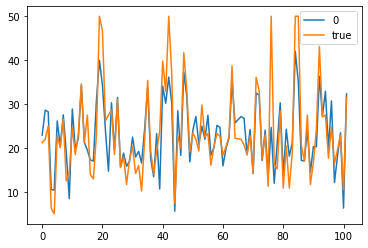

In [231]:
y_tests[["0","true"]].plot()
plt.show()
